In [6]:
import requests
from bs4 import BeautifulSoup   
import jieba
import jieba.analyse
import pandas as pd
from collections import Counter

In [7]:
url = 'https://www.ptt.cc/bbs/movie/M.1668529382.A.0B6.html'  
request_header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
response = requests.get(url, headers = request_header)
soup = BeautifulSoup(response.text, 'lxml')
movie = soup.find('div', {'id':'main-content'}).text 
movie

'作者LittleDiDi (小弟弟弟弟大)看板movie標題[好雷] 微笑 - 笑到你心裡發寒時間Wed Nov 16 00:22:59 2022\n\n\n大家好\n我是專看恐怖片的LittleDiDi\n我又來介紹恐怖片了\n\n今天要聊的是近期呼聲頗大的《微笑》\n嚇人手法有點東西\n劇情能再完整點就更好了\n整體而言是一部值得一看的佳作\n\n\nBlog圖文版會更精彩\nhttps://littledidi.pixnet.net/blog/post/232465987\n\n\n年份：2022\n\n語言：英文\n\n類型：靈異、鬼怪\n\n導演：Parker Finn\n\n\n[劇情簡介]\n\n在目睹一名病人詭異的創傷經驗之後，蘿絲卡特醫師（蘇西貝肯 飾）開始經歷一些她無\n法解釋的恐怖事件。當一股令人不寒而慄的可怕力量開始佔據她的生活，蘿絲就必須面對\n她令人不安的陰暗過去，才能夠存活並逃離她充滿恐懼的全新現實。\n\n編劇兼導演帕克菲恩表示，這是一部超級驚悚的電影，瀰漫著一股令人不安的詭異氛圍，\n就像是越做越恐怖的惡夢，片中的惡靈把“微笑”當作面具並隱藏真正的意圖，就在你臨\n死之前，會看到它正對著你微笑，但那並不是友善的微笑，而是你此生從未見過最可怕的\n笑容，此時惡靈已入侵。\n\n這部電影的故事會讓你懷疑，現實中可能真的會發生…。面對你無法逃避的東西，又不知\n道它來自哪裡，這種心理層面上的恐懼令人毛骨悚然。飾演女主角蘿絲的蘇西貝肯談到，\n導演透過鏡頭敘述故事的方式，是從來沒看過的手法而且超恐怖，你絕對想不到接下來會\n發生什麼事。\n\n(以上引用自開眼電影網)\n\n--\n\n最近有一些好朋友艾特我看這部《微笑》，說被嚇壞了，我也不是非要強調自己身經百戰\n、什麼大場面沒見過的那種人，為了增加難度，特選在週末的午夜三點關燈看，\nbenchmark大家的狀態。平心而論，這部片子氣氛確實營造得很不錯，有幾個不錯的跳躍\n式驚嚇，連我都被嚇到了。\n\n可惜的是，西洋片在駕馭超自然電影的認知上，似乎與東方人有些落差，以至於攤牌的時\n候瞬間弱掉不少，或許單純是文化上的差異，或許人家覺得我們一堆魑魅魍魎才奇怪咧。\n\n--\n\n簡單替本片劇情提要，大意是說，女主角蘿絲是一名心理醫生，某天有個來投醫的病患，\n神經兮兮地講述一些不明

In [8]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
import jieba
import jieba.analyse
from collections import Counter

{'LittleDiDi': 2, '看板': 1, 'movie': 2, '標題': 1, '好雷': 1, '微笑': 14, '心裡': 2, '發寒': 2, '時間': 1, 'Wed': 1, 'Nov': 1, '16': 2, '00': 1, '22': 1, '59': 1, '2022': 2, '專看': 1, '恐怖片': 5, '介紹': 1, '呼聲': 1, '嚇人': 2, '手法': 4, '有點': 2, '東西': 2, '劇情': 5, '點就': 1, '整體': 1, '一部': 4, '值得一看': 2, '佳作': 2, 'Blog': 1, '文版': 1, 'https': 2, 'littledidi': 1, 'pixnet': 1, 'net': 1, 'blog': 1, 'post': 1, '232465987': 1, '語言': 1, '類型': 1, '靈異': 1, '導演': 2, 'Parker': 1, 'Finn': 1, '簡介': 1, '一名': 2, '詭異': 4, '創傷': 1, '經驗': 1, '蘿絲': 4, '醫師': 1, '蘇西貝肯': 2, '開始': 2, '經歷': 3, '一些': 3, '法解釋': 1, '恐怖事件': 1, '一股': 2, '令人': 3, '不寒而慄': 1, '可怕': 5, '必須': 1, '令人不安': 2, '暗過': 1, '並逃離': 1, '充滿': 1, '恐懼': 2, '現實': 2, '編劇': 1, '兼導': 1, '演帕克菲恩': 1, '這是': 1, '超級': 1, '電影': 7, '漫著': 1, '氛圍': 1, '恐怖': 3, '惡夢': 1, '惡靈': 2, '當作': 1, '並隱藏': 1, '意圖': 1, '那並': 1, '見過': 1, '此時': 1, '這部': 3, '故事': 2, '懷疑': 1, '真的': 3, '發生': 3, '面對': 1, '無法': 1, '哪裡': 1, '這種': 1, '心理': 2, '飾演': 1, '女主角': 3, '談到': 1, '透過': 1, '鏡頭': 1, '敘述': 1, '看過': 1, '絕對

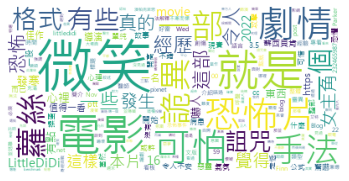

<Figure size 400x200 with 0 Axes>

In [24]:
jieba.load_userdict('dict.txt')
jieba.analyse.set_stop_words('stopword.txt')

tags = jieba.analyse.extract_tags(movie, topK=200)
word = jieba.lcut(movie)
count = Counter(word)

freq = {}
for i in count:
    if i in tags:
        freq[i] = count[i]
print(freq)

# 文字雲樣式設定
stopwords = {"也","但","來","個","再","的","和","是","就是","有","有些","更","會","可能",'\n'}
wc = WordCloud(font_path= "C:\Windows\Fonts\msjh.ttc", #設置字體
               background_color="white", #背景顏色
               max_words = 200 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞

wc.generate_from_frequencies(freq)
 
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(20,10), dpi =20)
plt.show()

In [25]:
#合併欄位資料
df = [pd.DataFrame(count.keys()), pd.DataFrame(count.values())]

result = pd.concat(df, axis=1)
result.columns = ['word', 'count']

In [26]:
import plotly.express as px
import pandas as pd

px.bar(result, x='word', y='count', title='Number of words')